In [1]:
import numpy as np
from AMAT.approach import Approach
from AMAT.orbiter import PropulsiveOrbiter
import matplotlib.pyplot as plt

In [2]:
approach1 = Approach(
    "URANUS", 
    v_inf_vec_icrf_kms=np.array([0.1, 10.01192666,  0.1]),
    rp=(25559 + 4000)*1e3, 
    psi=np.pi
)

In [3]:
approach2 = Approach(
    "URANUS", 
    v_inf_vec_icrf_kms=np.array([0.1, 20.01192666,  0.1]),
    rp=(25559 + 4000)*1e3, 
    psi=np.pi
)

In [4]:
orbiter1 = PropulsiveOrbiter(approach=approach1, apoapsis_alt_km=1000E3)
orbiter2 = PropulsiveOrbiter(approach=approach2, apoapsis_alt_km=1000E3)

In [5]:
print(orbiter1.DV_OI_mag)
print(orbiter2.DV_OI_mag)

2667.172865544996
8631.465551395186


In [6]:
def mf_m0(DV, Isp=320):
    return  round(max(0.01, 1 - 1.10*(1 - np.exp(-DV/(Isp*9.80665)))), 2)

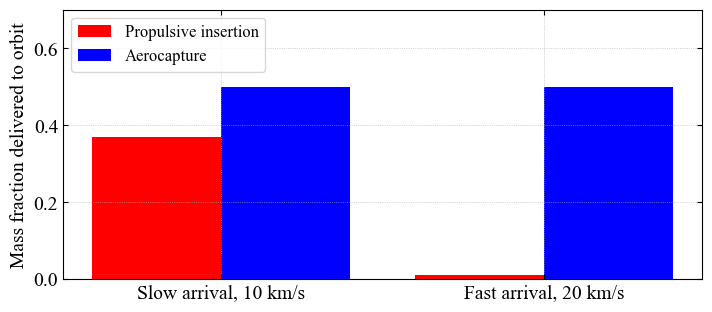

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8.25, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

y1 = [mf_m0(orbiter1.DV_OI_mag), mf_m0(orbiter2.DV_OI_mag)]
y2 = [0.5, 0.5]

x = np.arange(2)
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width=0.4, color='red')
plt.bar(x+0.2, y2, width=0.4, color='blue')
plt.xticks(x, ['Slow arrival, 10 km/s', 'Fast arrival, 20 km/s'])

ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.grid(linestyle='dotted', linewidth=0.5)
plt.ylabel('Mass fraction delivered to orbit', fontsize=14)
plt.ylim([0, 0.7])

plt.legend(["Propulsive insertion", "Aerocapture"], loc='upper left', fontsize=12)
plt.savefig('../performance-analysis-plots/uranus.png', dpi= 300, bbox_inches='tight')
plt.show()